In [8]:
import pandas as pd
diabetes=pd.read_csv('pima-indians-diabetes.csv')
diabetes.columns = ["Number_pregnant", "Glucose_conc", "blood_press", "skin_thick","serum_insulin","BMI","pedi","age","class"]
diabetes.head()

,Number_pregnant,Glucose_conc,blood_press,skin_thick,serum_insulin,BMI,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [13]:
cols_to_norm=['Number_pregnant','Glucose_conc','blood_press','skin_thick','BMI','pedi']
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
diabetes.head()

,Number_pregnant,Glucose_conc,blood_press,skin_thick,serum_insulin,BMI,pedi,age,class
0,0.058824,0.427136,0.540984,0.292929,0,0.396423,0.116567,31,0
1,0.470588,0.919598,0.524590,0.000000,0,0.347243,0.253629,32,1
2,0.058824,0.447236,0.540984,0.232323,94,0.418778,0.038002,21,0
3,0.000000,0.688442,0.327869,0.353535,168,0.642325,0.943638,33,1
4,0.294118,0.582915,0.606557,0.000000,0,0.381520,0.052519,30,0


In [15]:
import tensorflow as tf
num_preg=tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc=tf.feature_column.numeric_column("Glucose_conc")
dias_press=tf.feature_column.numeric_column("blood_press")
triceps=tf.feature_column.numeric_column("skin_thick")
insulin=tf.feature_column.numeric_column("serum_insulin")
bmi=tf.feature_column.numeric_column("BMI")
diabetes_pedigree=tf.feature_column.numeric_column("pedi")
age=tf.feature_column.numeric_column('age')


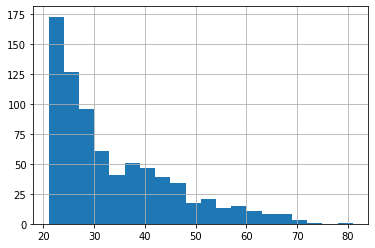

In [17]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['a','b',...])
%matplotlib inline
diabetes['age'].hist(bins=20)

In [21]:
age_buckets=tf.feature_column.bucketized_column(age,boundaries=(20,30,40,50,60,70,80))
feat_cols=[num_preg,plasma_gluc,dias_press,triceps,insulin,bmi,assigned_group,age_buckets]

In [30]:
x_data=diabetes.drop('class',axis=1)
labels=diabetes['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,labels,test_size=0.33,random_state=101)


In [33]:
print(tf.__version__)

2.8.0


**model/train**

In [54]:
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10
,num_epochs=1000,shuffle=True)
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4x11xl0j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


ValueError: ignored

**prediction**

In [56]:
pred_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=x_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
predictions=model.predict(pred_input_func)

In [57]:
list(predictions)

INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmp4x11xl0j, running initialization to predict.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


ValueError: ignored

**evaluation**

In [59]:
eval_input_func=tf.compat.v1.estimator.inputs.pandas_inputs_fn(
    x=x_test,
    y=t_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False)
results=model.evaluate(eval_input_func)
results

AttributeError: ignored